## Task 2

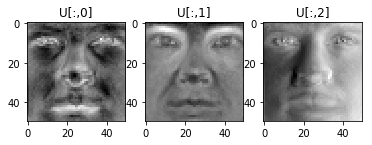

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

# define parameters
N_person=10
N_train=7
k=20
n0=1
a0=0
prefix=['person01','person02','person03','person04','person05','person06','person07','person08','person09','person10']

# define the function to get input matrix of vectorized images from subsets
def Inputmatrix(A,N2,prefix,n,a):
    label=[]
    for i,dp in enumerate(prefix):
        for j in range(N2):
            A[:,i*N2+j]=np.float64(imageio.imread('../data/task2_data/subset%d'%(a)+'/'+dp+'_'+'%02d.png'%(j+n)).ravel())
            label = np.concatenate((label,np.expand_dims(i+1,axis=0)))
            label=label.astype(int)
    A=A/255
    return A,label

# get training data and labels
T=np.zeros((50*50,N_person*N_train))
[T,Tlabel]=Inputmatrix(T,N_train,prefix,n0,a0)

# define the function to do SVD of X
def sigularmatrix(X):
    mu=np.mean(T,axis=1)
    X_c=T-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    UU = U[:,0:k]
    return UU

# obtain 20 first singular vectors U[:,0:20]
U=sigularmatrix(T)

# display first 3 vectors as images
plt.subplot(1,3,1)
plt.imshow(U[:,0].reshape(50,50),cmap='gray')
plt.title('U[:,0]')
plt.subplot(1,3,2)
plt.imshow(U[:,1].reshape(50,50),cmap='gray')
plt.title('U[:,1]')
plt.subplot(1,3,3)
plt.imshow(U[:,2].reshape(50,50),cmap='gray')
plt.title('U[:,2]')
plt.show()

In [3]:
N_test=[12,12,14,19]
n=[8,20,32,46]
a=[1,2,3,4]

# get testing data from subsets 1-4
def Testmatrix(m):
    S=np.zeros((50*50,N_person*N_test[m]))
    Slabel=[]
    [S,Slabel]=Inputmatrix(S,N_test[m],prefix,n[m],a[m])
    return S,Slabel

S=[[],[],[],[]]
Slabel=[[],[],[],[]]
for i in range(4):
    [S[i],Slabel[i]]=Testmatrix(i)

def prediction_point(m):
    T_c=T-np.expand_dims(np.mean(T,axis=1),axis=1)    
    S_c=S[m]-np.expand_dims(np.mean(S[m],axis=1),axis=1)
    Yt = np.dot(U.T,T_c)
    Ys = np.dot(U.T,S_c)
    Truelabel=Slabel[m]
    kk = 3
    k=20
    sumerror=[]
    for j in range(k):
        error=np.zeros((k))
        for i in range(Ys.shape[1]): 
            one=np.tile(Ys[j, i], (1, N_train*N_person))
            dist = np.linalg.norm( one-Yt[j], axis=0) # euclidean distance
            index_nns = np.argsort(dist)[0:3]  
            pred_nns = np.array([Tlabel[i] for i in index_nns]) # prediction of 3 nearest neighbours       
            prediction = np.bincount(pred_nns).argmax() # the most frequent occurence as final prediction 
            reallabel = Truelabel[i]
            error += (prediction != reallabel)
        sumerror=np.append(sumerror,error) 
    a=sumerror[::20]
    error_rate=a/(N_test[m]*N_person)
    return(error_rate)

In [4]:
error_rate=[[],[],[],[]]
for i in range(4):
    error_rate[i]=np.append(error_rate[i],prediction_point(i))

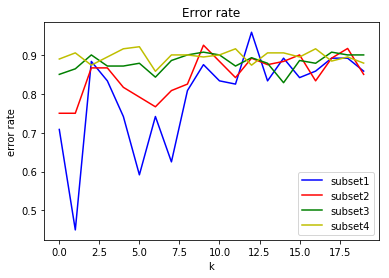

In [5]:
plt.plot(np.arange(20), error_rate[0], 'b-',
         np.arange(20), error_rate[1], 'r-',
         np.arange(20), error_rate[2], 'g-',
         np.arange(20), error_rate[3], 'y-',)
plt.title('Error rate')
plt.xlabel('k')
plt.ylabel('error rate')
plt.legend(("subset1", "subset2", "subset3", "subset4"))
plt.show()